# 4.2 손실 함수

## 4.2.1 평균 제곱 오차

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1 ,0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정함
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

## 4.2.2 교차 엔트로피 오차

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [19]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [20]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

In [21]:
cross_entropy_error(y, t)

0.51082545709933802

In [22]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

In [23]:
cross_entropy_error(y, t)

2.3025840929945458

## 4.2.3 미니배치 학습

In [25]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [26]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

In [28]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [31]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [36]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [1]:
# 정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어졌을 때
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.su(np.log(y[np.arange(batch_size), t])) / batch_size

# 4.3 수치 미분

## 4.3.1 미분

In [2]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

문제점
1. 반올림 오차 -> $h = 10^{-4}$를 사용
2. 진정한 미분과 수치 미분의 값은 다르다 -> 중심 차분을 사용

In [11]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

## 4.3.2 수치 미분의 예

$ y =0.01x^2+0.1x $

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [13]:
import numpy as np
import matplotlib.pylab as plt

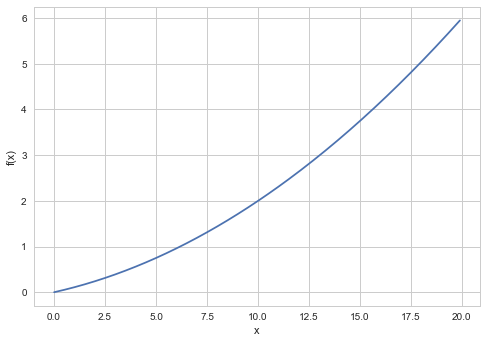

In [14]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [15]:
numerical_diff(function_1, 5)

0.1999999999990898

In [16]:
numerical_diff(function_1, 10)

0.2999999999986347

## 4.3.3 편미분

$ f(x_0, x_1) = x_0^2+x_1^2 $

In [19]:
def function_2(x):
    return np.sum(x**2) # return x[0]**2 + x[1]**2

In [20]:
# x0=3, x1=4 일 때 x0편미분
def function_tmp1(x0):
    return  x0*x0 + 4.0**2.0

In [21]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
# x0=3, x1=4 일 때 x1편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [23]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 기울기

모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)하고 한다.

In [24]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx] 
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [25]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [26]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [27]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

## 4.4.1 경사법(경사하강법)

In [28]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

$ f(x_0, x_1) = x_0^2+x_1^2 $ 의 최솟값을 구하라

In [30]:
init_x = np.array([-3.0, 4.0])

In [31]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [33]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [34]:
# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

## 4.4.2 신경망에서의 기울기

In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [5]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [36]:
net = simpleNet()
print(net.W)

[[-0.07306813 -0.6943069  -0.55580829]
 [-1.83289727 -0.56053267  1.76448337]]


In [37]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.69344842 -0.92106354  1.25455006]


In [38]:
np.argmax(p)

2

In [39]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

0.15356453678499662

In [41]:
def f(W):
    return net.loss(x, t)

In [42]:
dW = numerical_gradient(f, net.W)

In [43]:
print(dW)

[[ 0.02698731  0.05842545 -0.08541275]
 [ 0.04048096  0.08763817 -0.12811913]]


# 4.5 학습 알고리즘 구현하기

## 4.5.1 2층 신경망 클래스 구현하기

In [44]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [46]:
class TwoLayerNet:
    def __Init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.rand(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.rand(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [50]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

TypeError: object() takes no parameters